Method to try to match lines, mainly in absorption, with known lines at different velocities. The lineid must be identified first to discard wrong detections.

In [1]:
import sys
sys.path.append("/home/stephane/git/alma-calibrator/src")

import lineTools as lt
import pickle
import matplotlib.pyplot as pl

al = lt.analysisLines("/home/stephane/Science/RadioGalaxy/ALMA/absorptions/analysis/a/lineAll.db")

In [2]:
%matplotlib inline

We define the source to be scanned from the lineAll.db

In [3]:
def outputMatch(matches, minmatch = 5):

    for m in matches:
        imax = len(m)
        ifound = 0

        vel = m[0]
        
        for i in range(1,len(m)):
            if len(m[i]) > 0:
                ifound += 1
        
        if ifound >= minmatch:
            print("########################")
            print("## velocity: %f"%(vel))
            print("## Freq. matched: %d"%(ifound))
            print("##")
            print("## Formula Name E_K Frequency")
            print("##              (K)   (MHz)")
            for i in range(1,len(m)):
                if len(m[i]) > 0:
                    print("## Line:")
                    for line in m[i]:
                        print line
        
            print("##      \n###END###\n")

In [4]:
source = "J004916-445738"
redshift = 0.1213
lineid = [9520, 9527, 9532, 9534, 9535, 9542, 9545]

Scan through the lines (lineid) matching with a local splatalogue.db. emax is the maximum energy of the upper level to restrain to low energy transitions...

In [5]:
m = al.scanningSplatVelocitySourceLineid(lineid, velmin = -200. , velmax = 200, dv = 0.5 ,nrao = True, emax= 30., absorption = True, emission = True )

## Number of lines: 7
## Galactic scanning ...
## Connect to local splatalogue ...
## Velocity: -200.00000   (0.0% done)
### Lines found: 0
## Velocity: -199.50000   (0.1% done)
### Lines found: 0
## Velocity: -199.00000   (0.2% done)
### Lines found: 0
## Velocity: -198.50000   (0.4% done)
### Lines found: 0
## Velocity: -198.00000   (0.5% done)
### Lines found: 0
## Velocity: -197.50000   (0.6% done)
### Lines found: 0
## Velocity: -197.00000   (0.8% done)
### Lines found: 0
## Velocity: -196.50000   (0.9% done)
### Lines found: 0
## Velocity: -196.00000   (1.0% done)
### Lines found: 0
## Velocity: -195.50000   (1.1% done)
### Lines found: 0
## Velocity: -195.00000   (1.2% done)
### Lines found: 0
## Velocity: -194.50000   (1.4% done)
### Lines found: 0
## Velocity: -194.00000   (1.5% done)
### Lines found: 1
## Velocity: -193.50000   (1.6% done)
### Lines found: 1
## Velocity: -193.00000   (1.8% done)
### Lines found: 1
## Velocity: -192.50000   (1.9% done)
### Lines found: 0
## Ve

In [6]:
vel = []
lineDetected =[]
minmatch = 2

for l in m:
    vel.append(l[0])
    
    ifound = 0
    
    for i in range(1,len(l)):
        if len(l[i]) > 0:
            ifound += 1
            
    if ifound >= minmatch:
        print("### Velocity: %f"%(l[0]))
        print("##")
        for line in l[1:-1]:
            if len(line) > 0:
                print line
        print("\n\n")
    
    
    lineDetected.append(ifound)

### Velocity: -24.000000
##
[(u'c-C3H', u'Cyclopropenylidyne', u' 3( 3, 1)- 3( 1, 2), J=5/2-7/2,  F= 3- 3', 20.2069497099464, 110845.6673, 715)]
[(u'OCS v=0', u'Carbonyl Sulfide', u'    7        -   6', 16.3443182012578, 85139.104, 317)]



### Velocity: -15.000000
##
[(u'c-C3H', u'Cyclopropenylidyne', u' 3( 3, 1)- 3( 1, 2), J=5/2-7/2,  F= 2- 3', 20.2067936346538, 110842.4152, 715)]
[(u'CH3SH v=0', u'Methyl Mercaptan', u'    2( 1) <sup>- </sup> -  2( 0) <sup>+</sup>A ', 8.75384467627945, 106524.098, 841)]



### Velocity: 177.500000
##
[(u'gGa-(CH2OH)2', u'Ethylene Glycol', u' 4( 4, 1) v= 1  -   3( 3, 0) v= 1', 13.1122944517761, 112645.6073, 121)]
[(u'c-H2C3O', u'Cyclopropenone', u' 6( 3, 3)- 5( 3, 2)', 25.0523087775789, 85081.8754, 136)]





Plot the detected lines vs. the velocity

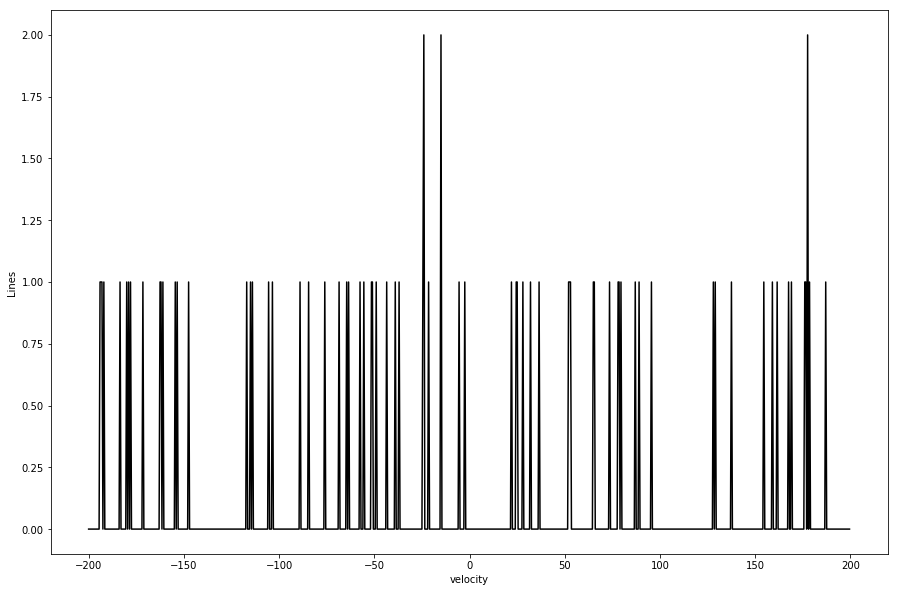

In [7]:
pl.figure(figsize=(15,10))
pl.xlabel("velocity")
pl.ylabel("Lines")
pl.plot(vel, lineDetected, "k-")
pl.show()


In [8]:
## uncomment to save the data in a pickle file
#f = open("3c273-vel-scan.pickle","w")
#pickle.dump(m,f )
#f.close()

Display the matching transitions

In [9]:
outputMatch(m, minmatch)

########################
## velocity: -24.000000
## Freq. matched: 2
##
## Formula Name E_K Frequency
##              (K)   (MHz)
## Line:
(u'c-C3H', u'Cyclopropenylidyne', u' 3( 3, 1)- 3( 1, 2), J=5/2-7/2,  F= 3- 3', 20.2069497099464, 110845.6673, 715)
## Line:
(u'OCS v=0', u'Carbonyl Sulfide', u'    7        -   6', 16.3443182012578, 85139.104, 317)
##      
###END###

########################
## velocity: -15.000000
## Freq. matched: 2
##
## Formula Name E_K Frequency
##              (K)   (MHz)
## Line:
(u'c-C3H', u'Cyclopropenylidyne', u' 3( 3, 1)- 3( 1, 2), J=5/2-7/2,  F= 2- 3', 20.2067936346538, 110842.4152, 715)
## Line:
(u'CH3SH v=0', u'Methyl Mercaptan', u'    2( 1) <sup>- </sup> -  2( 0) <sup>+</sup>A ', 8.75384467627945, 106524.098, 841)
##      
###END###

########################
## velocity: 177.500000
## Freq. matched: 2
##
## Formula Name E_K Frequency
##              (K)   (MHz)
## Line:
(u'gGa-(CH2OH)2', u'Ethylene Glycol', u' 4( 4, 1) v= 1  -   3( 3, 0) v= 1', 13.11